## 5-order polynomial fit - Ridge

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Dataset
np.random.seed(168)
n = 100
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

#Design matrix
X = np.ones((n, 6))
X[:, 1] = x.flatten()
X[:, 2] = (x**2).flatten()
X[:, 3] = (x**3).flatten()
X[:, 4] = (x**4).flatten()
X[:, 5] = (x**5).flatten()

#Substract the mean
X[:, 0] = X[:, 0] - np.mean(X[:, 0])
X[:, 1] = X[:, 1] - np.mean(X[:, 1])
X[:, 2] = X[:, 2] - np.mean(X[:, 2])
X[:, 3] = X[:, 3] - np.mean(X[:, 3])
X[:, 4] = X[:, 4] - np.mean(X[:, 4])
X[:, 5] = X[:, 5] - np.mean(X[:, 5])

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Train MSE:  0.031343242335952384
Test MSE:  0.02811082874376299


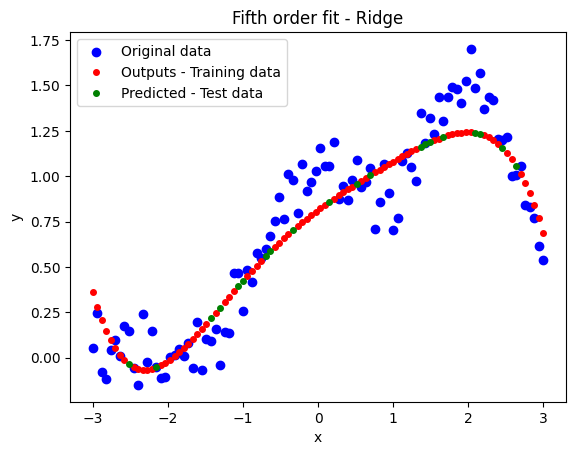

In [42]:
#Perform Ridge optimization
lambd = 0.001
betas_ridge = np.linalg.inv(X_train.T @ X_train + lambd*np.eye(len(X_train.T @ X_train))) @ X_train.T @ y_train

#Make predictions (shift the data to unscale to the original data)
y_tilde_train = X_train @ betas_ridge + np.mean(y_train)
y_tilde_test = X_test @ betas_ridge + np.mean(y_train)

#Use built-in MSE score
from sklearn.metrics import mean_squared_error

print("Train MSE: ", mean_squared_error(y_train, y_tilde_train))
print("Test MSE: ", mean_squared_error(y_test, y_tilde_test))

#Plotting
x_train = X_train[:, 1]
x_test = X_test[:, 1]
plt.scatter(x, y, color='blue', label='Original data')
plt.plot(x_train, y_tilde_train, "ro", ms=4, label='Outputs - Training data')
plt.plot(x_test, y_tilde_test, "go", ms=4, label="Predicted - Test data")
plt.title("Fifth order fit - Ridge")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Lambda values:  [0.0001, 0.001, 0.01, 0.1, 1.0]
Train errors:  [0.03134374305053703, 0.031343242335952384, 0.03133824825188294, 0.03128959369538907, 0.03091413521991231]
Test errors:  [0.028109898095920544, 0.02811082874376299, 0.028120137840928334, 0.02821347836229729, 0.029161388807101868]


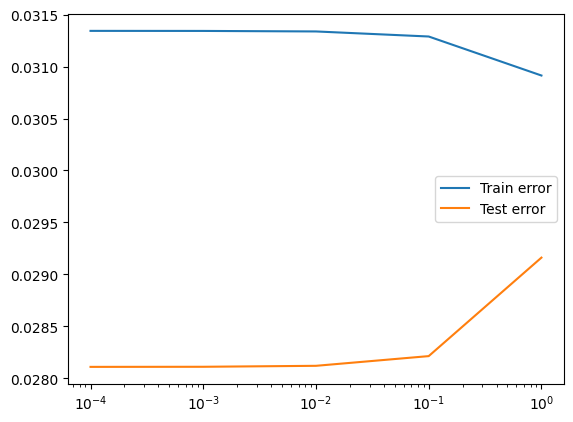

In [43]:
#Compute the train and test error for different values of Lambdas
lambds = [0.0001, 0.001, 0.01, 0.1, 1.0]

train_errs = []
test_errs = []

#Compute errors
for lambd in lambds:
  betas_ridge = np.linalg.inv(X_train.T @ X_train + lambd*np.eye(len(X_train.T @ X_train))) @ X_train.T @ y_train
  y_tilde_train = X_train @ betas_ridge + np.mean(y_train)
  y_tilde_test = X_test @ betas_ridge + np.mean(y_train)

  train_errs.append(mean_squared_error(y_train, y_tilde_train))
  test_errs.append(mean_squared_error(y_test, y_tilde_test))

print("Lambda values: ", lambds)
print("Train errors: ", train_errs)
print("Test errors: ", test_errs)

#Plotting
plt.plot(lambds, train_errs, label="Train error")
plt.plot(lambds, test_errs, label="Test error")
plt.xscale("log")
plt.legend()
plt.show()

## 10-order polynomial fits - Ridge vs OLS

In [56]:
########### OLS #############
#Dataset
np.random.seed(168)
n = 100
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

#Design matrix
X = np.ones((n, 11))
for k in range(11):
  X[:, k] = (x**k).flatten()

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Make some predictions
betas_OLS = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
y_OLS_train = X_train @ betas_OLS
y_OLS_test = X_test @ betas_OLS

OLS Train MSE:  0.009844129238422908
OLS Test MSE:  0.01164553993388033
Ridge Train MSE:  0.017861240992508482
Ridge Test MSE:  0.020204132166977962


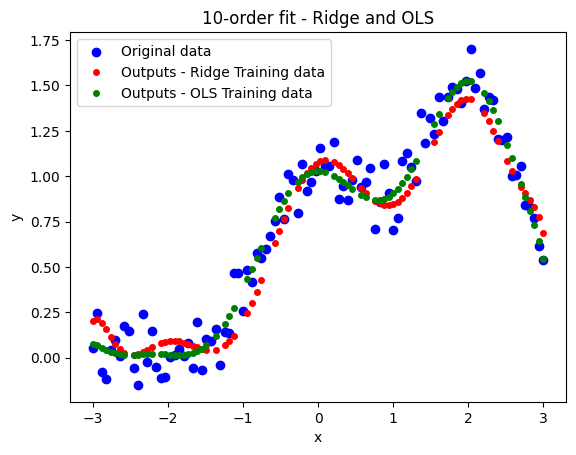

In [57]:
################ Ridge #################3
#Dataset
np.random.seed(168)
n = 100
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

#Design matrix
X = np.ones((n, 11))
for k in range(11):
  X[:, k] = (x**k).flatten()
  X[:, k] = X[:, k] - np.mean(X[:, k])

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lambd = 0.0001
betas_ridge = np.linalg.inv(X_train.T @ X_train + lambd*np.eye(len(X_train.T @ X_train))) @ X_train.T @ y_train

#Make predictions
y_ridge_train = X_train @ betas_ridge + np.mean(y_train)
y_ridge_test = X_test @ betas_ridge + np.mean(y_train)

#Use built-in MSE score
from sklearn.metrics import mean_squared_error
print("OLS Train MSE: ", mean_squared_error(y_train, y_OLS_train))
print("OLS Test MSE: ", mean_squared_error(y_test, y_OLS_test))
print("Ridge Train MSE: ", mean_squared_error(y_train, y_ridge_train))
print("Ridge Test MSE: ", mean_squared_error(y_test, y_ridge_test))

#Plotting
x_train = X_train[:, 1]
x_test = X_test[:, 1]
plt.scatter(x, y, color='blue', label='Original data')
plt.plot(x_train, y_ridge_train, "ro", ms=4, label='Outputs - Ridge Training data')
# plt.plot(x_test, y_ridge_test, "go", ms=4, label="Predicted - Ridge Test data")
plt.plot(x_train, y_OLS_train, "go", ms=4, label='Outputs - OLS Training data')
# plt.plot(x_test, y_OLS_test, "co", ms=4, label="Predicted - OLS Test data")
plt.title("10-order fit - Ridge and OLS")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 15-order polynomial fits - Ridge vs OLS

In [58]:
########### OLS #############
#Dataset
np.random.seed(168)
n = 100
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

#Design matrix
X = np.ones((n, 16))
for k in range(16):
  X[:, k] = (x**k).flatten()

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Make some predictions
betas_OLS = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
y_OLS_train = X_train @ betas_OLS
y_OLS_test = X_test @ betas_OLS

OLS Train MSE:  0.009574535003100685
OLS Test MSE:  0.011575601774919644
Ridge Train MSE:  0.021210441066294772
Ridge Test MSE:  0.031038069019327468


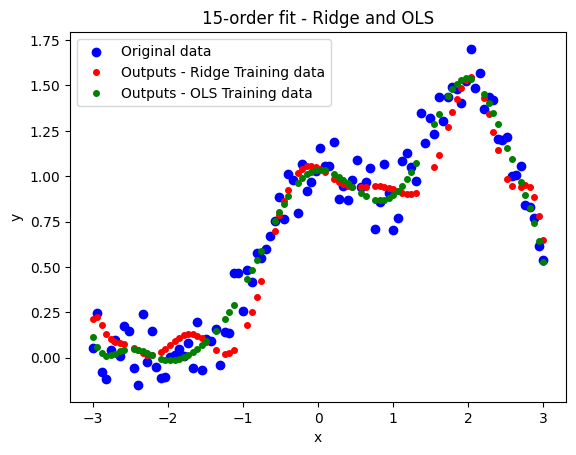

In [59]:
################ Ridge #################3
#Dataset
np.random.seed(168)
n = 100
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

#Design matrix
X = np.ones((n, 16))
for k in range(16):
  X[:, k] = (x**k).flatten()
  X[:, k] = X[:, k] - np.mean(X[:, k])

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lambd = 0.0001
betas_ridge = np.linalg.inv(X_train.T @ X_train + lambd*np.eye(len(X_train.T @ X_train))) @ X_train.T @ y_train

#Make predictions
y_ridge_train = X_train @ betas_ridge + np.mean(y_train)
y_ridge_test = X_test @ betas_ridge + np.mean(y_train)

#Use built-in MSE score
from sklearn.metrics import mean_squared_error
print("OLS Train MSE: ", mean_squared_error(y_train, y_OLS_train))
print("OLS Test MSE: ", mean_squared_error(y_test, y_OLS_test))
print("Ridge Train MSE: ", mean_squared_error(y_train, y_ridge_train))
print("Ridge Test MSE: ", mean_squared_error(y_test, y_ridge_test))

#Plotting
x_train = X_train[:, 1]
x_test = X_test[:, 1]
plt.scatter(x, y, color='blue', label='Original data')
plt.plot(x_train, y_ridge_train, "ro", ms=4, label='Outputs - Ridge Training data')
# plt.plot(x_test, y_ridge_test, "go", ms=4, label="Predicted - Ridge Test data")
plt.plot(x_train, y_OLS_train, "go", ms=4, label='Outputs - OLS Training data')
# plt.plot(x_test, y_OLS_test, "co", ms=4, label="Predicted - OLS Test data")
plt.title("15-order fit - Ridge and OLS")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Errors and Discussion

After performing the fit for 5, 10 and 15 - order polynomial using Ridge and OLS, it is computed the erros for these complexities.

In [71]:
#Dataset
np.random.seed(168)
n = 100
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

### 5-order ####
#Design matrix
X = np.ones((n, 6))
X[:, 1] = x.flatten()
X[:, 2] = (x**2).flatten()
X[:, 3] = (x**3).flatten()
X[:, 4] = (x**4).flatten()
X[:, 5] = (x**5).flatten()
betas_OLS_5 = np.linalg.inv(X.T @ X) @ X.T @ y
y_OLS_5 = X @ betas_OLS_5

### 10-order ####
#Design matrix
X = np.ones((n, 11))
for k in range(11):
  X[:, k] = (x**k).flatten()
betas_OLS_10 = np.linalg.inv(X.T @ X) @ X.T @ y
y_OLS_10 = X @ betas_OLS_10

### 15-order ####
#Design matrix
X = np.ones((n, 16))
for k in range(16):
  X[:, k] = (x**k).flatten()
betas_OLS_15 = np.linalg.inv(X.T @ X) @ X.T @ y
y_OLS_15 = X @ betas_OLS_15

#Errors
MSE_OLS_5 = [mean_squared_error(y, y_OLS_5)]*len(lambds)
MSE_OLS_10 = [mean_squared_error(y, y_OLS_10)]*len(lambds)
MSE_OLS_15 = [mean_squared_error(y, y_OLS_15)]*len(lambds)

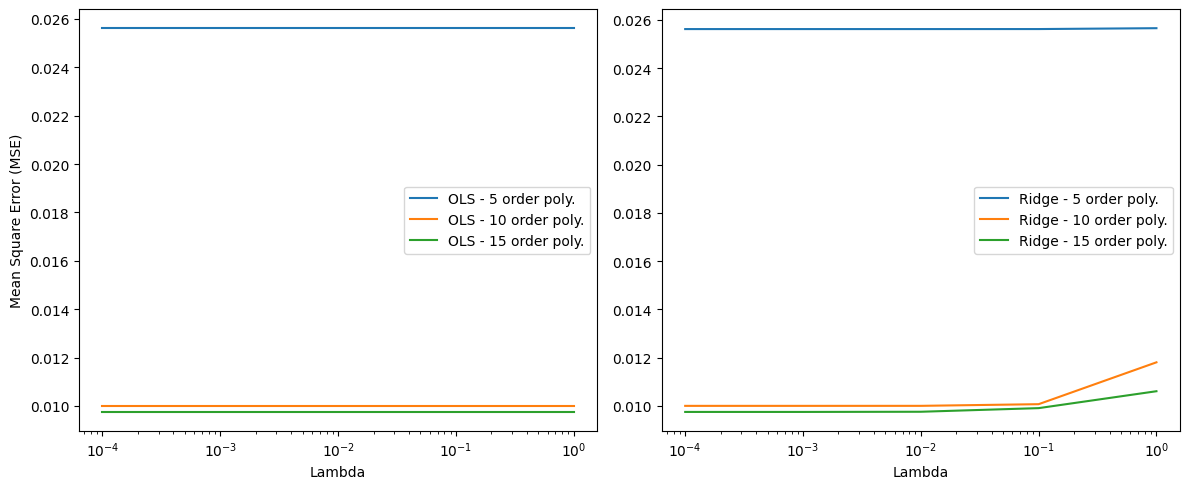

In [75]:
#Dataset
np.random.seed(168)
n = 100
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

#Lambdas
lambds = [0.0001, 0.001, 0.01, 0.1, 1.0]

#Errors to compute
MSE_Ridge_5 =[]
MSE_Ridge_10 = []
MSE_Ridge_15 = []

#### 5-order ####
#Design matrix
X = np.ones((n, 6))
X[:, 1] = x.flatten()
X[:, 2] = (x**2).flatten()
X[:, 3] = (x**3).flatten()
X[:, 4] = (x**4).flatten()
X[:, 5] = (x**5).flatten()

#Substract the mean
X[:, 0] = X[:, 0] - np.mean(X[:, 0])
X[:, 1] = X[:, 1] - np.mean(X[:, 1])
X[:, 2] = X[:, 2] - np.mean(X[:, 2])
X[:, 3] = X[:, 3] - np.mean(X[:, 3])
X[:, 4] = X[:, 4] - np.mean(X[:, 4])
X[:, 5] = X[:, 5] - np.mean(X[:, 5])

#Compute errors
for lambd in lambds:
  betas_ridge_5 = np.linalg.inv(X.T @ X + lambd*np.eye(len(X.T @ X))) @ X.T @ y
  y_Ridge_5 = X @ betas_ridge_5 + np.mean(y)
  MSE_Ridge_5.append(mean_squared_error(y, y_Ridge_5))

### 10-order ####
#Design matrix
X = np.ones((n, 11))
for k in range(11):
  X[:, k] = (x**k).flatten()
  X[:, k] = X[:, k] - np.mean((x**k).flatten())

#Compute errors
for lambd in lambds:
  betas_ridge_10 = np.linalg.inv(X.T @ X + lambd*np.eye(len(X.T @ X))) @ X.T @ y
  y_Ridge_10 = X @ betas_ridge_10 + np.mean(y)
  MSE_Ridge_10.append(mean_squared_error(y, y_Ridge_10))

### 15-order ####
#Design matrix
X = np.ones((n, 16))
for k in range(16):
  X[:, k] = (x**k).flatten()
  X[:, k] = X[:, k] - np.mean((x**k).flatten())

#Compute errors
for lambd in lambds:
  betas_ridge_15 = np.linalg.inv(X.T @ X + lambd*np.eye(len(X.T @ X))) @ X.T @ y
  y_Ridge_15 = X @ betas_ridge_15 + np.mean(y)
  MSE_Ridge_15.append(mean_squared_error(y, y_Ridge_15))

#Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

#Ordinary Least Squares
ax1.plot(lambds, MSE_OLS_5, label="OLS - 5 order poly.")
ax1.plot(lambds, MSE_OLS_10, label="OLS - 10 order poly.")
ax1.plot(lambds, MSE_OLS_15, label="OLS - 15 order poly.")
ax1.set_xscale("log")
ax1.set_xlabel('Lambda')
ax1.set_ylabel('Mean Square Error (MSE)')
ax1.legend()

# Ridge regression
ax2.plot(lambds, MSE_Ridge_5, label="Ridge - 5 order poly.")
ax2.plot(lambds, MSE_Ridge_10, label="Ridge - 10 order poly.")
ax2.plot(lambds, MSE_Ridge_15, label="Ridge - 15 order poly.")
ax2.set_xscale("log")
ax2.set_xlabel('Lambda')
ax2.legend()

plt.tight_layout()
plt.show()


# Discussion

As can be seen from the final plot of the error vs. Lambda values, for the OLS case the errors remain constant since in this model there is no dependence on $\lambda$. For the Ridge model, we see that as this $\lambda$ value increases the errors increase. For both models we see that the lowest error is achieved when considering the higher order polynomial. This makes sense since when considering higher polynomial orders, the exponential function is better approximated.


#Refs

For the first part of the code, the same line of work was followed as presented in the lecture notes https://compphysics.github.io/MachineLearning/doc/pub/week36/ipynb/week36.ipynb

For the analytical exercises the book *The Elements of Statistical Learning* by Hastie et al. was followed.